# Ground Observatory Data - VirES

> Authors: Ashley Smith
>
> Abstract: Demonstrates ground observatory data accessed through VirES - this is the AUX_OBS product distributed by BGS to support the Swarm mission, and contains data from INTERMAGNET and the WDC.

In [1]:
%load_ext watermark
%watermark -i -v -p viresclient,pandas,xarray,matplotlib

2021-01-24T16:16:24+00:00

CPython 3.7.6
IPython 7.11.1

viresclient 0.7.1
pandas 0.25.3
xarray 0.15.0
matplotlib 3.1.2


In [2]:
from viresclient import SwarmRequest

request = SwarmRequest()

### Data are organised into AUX_OBSM (minute) and AUX_OBSS (second) types

In [3]:
print(request.available_collections("AUX_OBSM", details=False))
print(request.available_collections("AUX_OBSS", details=False))

{'AUX_OBSM': ['SW_OPER_AUX_OBSM2_']}
{'AUX_OBSS': ['SW_OPER_AUX_OBSS2_']}


In [4]:
print(request.available_measurements("SW_OPER_AUX_OBSM2_"))
print(request.available_measurements("SW_OPER_AUX_OBSS2_"))

['B_NEC', 'F', 'IAGA_code', 'Quality']
['B_NEC', 'F', 'IAGA_code', 'Quality']


### Data can be requested similarly to Swarm MAG products

**Note that the IAGA_code variable is necessary in order to distinguish records**

**Note that there is a special message issued regarding the data terms**

In [5]:
request.set_collection("SW_OPER_AUX_OBSM2_")
request.set_products(["IAGA_code", "B_NEC", "F", "Quality"])
data = request.get_between("2016-01-01", "2016-01-03")
ds = data.as_xarray()
ds

[1/1] Processing:    0%|          |  [ Elapsed: 00:00, Remaining: ? ]


Accessing INTERMAGNET and/or WDC data
Check usage terms at ftp://ftp.nerc-murchison.ac.uk/geomag/Swarm/AUX_OBS/minute/README



[1/1] Processing:  100%|██████████|  [ Elapsed: 00:01, Remaining: 00:00 ]
      Downloading: 100%|██████████|  [ Elapsed: 00:00, Remaining: 00:00 ] (20.375MB)


<xarray.Dataset>
Dimensions:     (NEC: 3, Timestamp: 295200)
Coordinates:
  * Timestamp   (Timestamp) datetime64[ns] 2016-01-01 ... 2016-01-02T23:59:00
  * NEC         (NEC) <U1 'N' 'E' 'C'
Data variables:
    Spacecraft  (Timestamp) object '-' '-' '-' '-' '-' ... '-' '-' '-' '-' '-'
    B_NEC       (Timestamp, NEC) float64 3.804e+04 197.1 ... 764.8 4.623e+04
    Longitude   (Timestamp) float64 72.87 18.82 171.8 58.6 ... 316.4 15.86 9.073
    Latitude    (Timestamp) float64 18.5 68.23 -13.73 ... -22.26 47.74 53.56
    IAGA_code   (Timestamp) <U3 'ABG' 'ABK' 'API' 'ARS' ... 'VSS' 'WIC' 'WNG'
    F           (Timestamp) float64 4.297e+04 5.33e+04 ... 4.85e+04 4.962e+04
    Radius      (Timestamp) float64 6.376e+06 6.36e+06 ... 6.367e+06 6.364e+06
    Quality     (Timestamp) <U1 'D' 'D' 'D' 'Q' 'D' 'D' ... 'D' 'D' 'Q' 'D' 'D'
Attributes:
    Sources:         ['SW_OPER_AUX_OBSM2__20160101T000000_20160101T235959_010...
    MagneticModels:  []
    RangeFilters:    []

### Use `SwarmRequest.available_observatories()` to find possible IAGA codes

In [6]:
request.available_observatories("SW_OPER_AUX_OBSM2_", details=True)


Accessing INTERMAGNET and/or WDC data
Check usage terms at ftp://ftp.nerc-murchison.ac.uk/geomag/Swarm/AUX_OBS/minute/README



IAGACode                  startTime                    endTime
0        AAA  2005-01-01T00:00:00+00:00  2015-12-31T23:59:00+00:00
1        AAE  1998-01-01T00:00:00+00:00  2013-12-31T23:59:00+00:00
2        ABG  1997-01-02T00:00:00+00:00  2019-12-31T23:59:00+00:00
3        ABK  1997-01-02T00:00:00+00:00  2020-12-25T23:59:00+00:00
4        AIA  2004-01-01T00:00:00+00:00  2015-12-08T23:59:00+00:00
..       ...                        ...                        ...
140      VSS  1999-01-01T00:00:00+00:00  2020-11-30T23:59:00+00:00
141      WIC  2015-01-01T00:00:00+00:00  2020-12-04T23:59:00+00:00
142      WNG  1997-01-02T00:00:00+00:00  2020-12-25T23:59:00+00:00
143      YAK  2009-01-01T00:00:00+00:00  2018-12-31T23:59:00+00:00
144      YKC  1997-01-02T00:00:00+00:00  2015-12-13T23:59:00+00:00

[145 rows x 3 columns]

In [7]:
request.available_observatories("SW_OPER_AUX_OBSM2_", '2016-01-01', '2016-01-02')


Accessing INTERMAGNET and/or WDC data
Check usage terms at ftp://ftp.nerc-murchison.ac.uk/geomag/Swarm/AUX_OBS/minute/README



['ABG',
 'ABK',
 'API',
 'ARS',
 'ASC',
 'ASP',
 'BDV',
 'BEL',
 'BFO',
 'BLC',
 'BMT',
 'BOU',
 'BOX',
 'BRD',
 'BRW',
 'BSL',
 'CBB',
 'CKI',
 'CLF',
 'CMO',
 'CNB',
 'CSY',
 'CTA',
 'CYG',
 'DED',
 'DLT',
 'DMC',
 'DUR',
 'EBR',
 'ESK',
 'EYR',
 'FCC',
 'FRD',
 'FRN',
 'FUR',
 'GAN',
 'GCK',
 'GDH',
 'GNG',
 'GUA',
 'GUI',
 'HAD',
 'HBK',
 'HER',
 'HLP',
 'HON',
 'HRB',
 'HRN',
 'HUA',
 'HYB',
 'IPM',
 'IRT',
 'IZN',
 'JCO',
 'KAK',
 'KDU',
 'KEP',
 'KHB',
 'KNY',
 'KOU',
 'LER',
 'LON',
 'LRM',
 'LYC',
 'LZH',
 'MAB',
 'MAW',
 'MBO',
 'MCQ',
 'MGD',
 'MMB',
 'NAQ',
 'NEW',
 'NGK',
 'NVS',
 'OTT',
 'PAG',
 'PET',
 'PST',
 'RES',
 'SBA',
 'SBL',
 'SFS',
 'SHU',
 'SIT',
 'SJG',
 'SOD',
 'SPG',
 'SPT',
 'STJ',
 'SUA',
 'TAM',
 'TDC',
 'THL',
 'THY',
 'TSU',
 'TUC',
 'UPS',
 'VIC',
 'VNA',
 'VSS',
 'WIC',
 'WNG']

### IAGA codes can be used to directly fetch specific observatories

Subset the collection with a special collection name like `"SW_OPER_AUX_OBSM2_:<IAGA_code>"` to get data from only that observatory.

In [8]:
request.set_collection("SW_OPER_AUX_OBSM2_:ABK")
request.set_products(["B_NEC", "F", "Quality"])
data = request.get_between("2016-01-01", "2016-01-03")
ds = data.as_xarray()
ds

[1/1] Processing:    0%|          |  [ Elapsed: 00:00, Remaining: ? ]


Accessing INTERMAGNET and/or WDC data
Check usage terms at ftp://ftp.nerc-murchison.ac.uk/geomag/Swarm/AUX_OBS/minute/README



[1/1] Processing:  100%|██████████|  [ Elapsed: 00:01, Remaining: 00:00 ]
      Downloading: 100%|██████████|  [ Elapsed: 00:00, Remaining: 00:00 ] (0.206MB)


<xarray.Dataset>
Dimensions:     (NEC: 3, Timestamp: 2880)
Coordinates:
  * Timestamp   (Timestamp) datetime64[ns] 2016-01-01 ... 2016-01-02T23:59:00
  * NEC         (NEC) <U1 'N' 'E' 'C'
Data variables:
    Spacecraft  (Timestamp) object '-' '-' '-' '-' '-' ... '-' '-' '-' '-' '-'
    B_NEC       (Timestamp, NEC) float64 1.074e+04 1.716e+03 ... 5.198e+04
    Longitude   (Timestamp) float64 18.82 18.82 18.82 ... 18.82 18.82 18.82
    Latitude    (Timestamp) float64 68.23 68.23 68.23 ... 68.23 68.23 68.23
    F           (Timestamp) float64 5.33e+04 5.331e+04 ... 5.32e+04 5.32e+04
    Radius      (Timestamp) float64 6.36e+06 6.36e+06 ... 6.36e+06 6.36e+06
    Quality     (Timestamp) <U1 'D' 'D' 'D' 'D' 'D' 'D' ... 'D' 'D' 'D' 'D' 'D'
Attributes:
    Sources:         ['SW_OPER_AUX_OBSM2__20160101T000000_20160101T235959_010...
    MagneticModels:  []
    RangeFilters:    []

### Magnetic models can be evaluated just like with the Swarm MAG datasets

In [9]:
request.set_collection("SW_OPER_AUX_OBSM2_:ABK")
request.set_products(
    measurements=["B_NEC"],
    models=["'CHAOS-internal' = 'CHAOS-Core' + 'CHAOS-Static'"],
    residuals=True
)
data = request.get_between("2016-01-01", "2016-01-03")
ds = data.as_xarray()

[1/1] Processing:    0%|          |  [ Elapsed: 00:00, Remaining: ? ]


Accessing INTERMAGNET and/or WDC data
Check usage terms at ftp://ftp.nerc-murchison.ac.uk/geomag/Swarm/AUX_OBS/minute/README



[1/1] Processing:  100%|██████████|  [ Elapsed: 00:02, Remaining: 00:00 ]
      Downloading: 100%|██████████|  [ Elapsed: 00:00, Remaining: 00:00 ] (0.175MB)


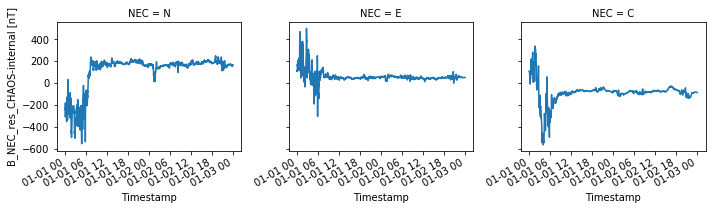

In [10]:
ds["B_NEC_res_CHAOS-internal"].plot.line(x="Timestamp", col="NEC")

(This roughly shows the disturbance sensed by the observatory due to the magnetospheric and ionospheric sources)